In [1]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


In [2]:
data = pd.read_csv('D:/project sem 3/Data-processed/milknew.csv')

In [3]:
data.head()

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour,Grade
0,6.6,35,1,0,1,0,254,high
1,6.6,36,0,1,0,1,253,high
2,8.5,70,1,1,1,1,246,low
3,9.5,34,1,1,0,1,255,low
4,6.6,37,0,0,0,0,255,medium


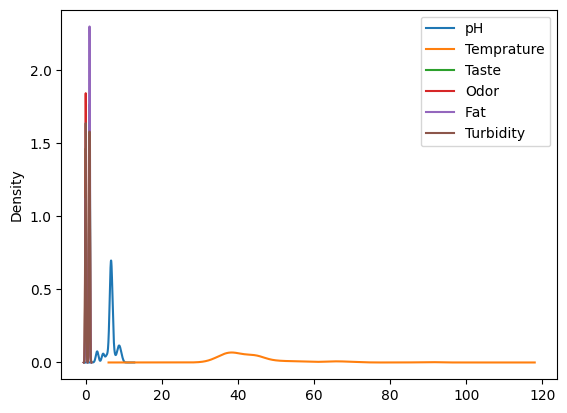

In [4]:
cols=data.columns[:6]
densityplot=data[cols].plot(kind='density')


In [5]:
data['Grade'].value_counts()

low       429
medium    374
high      256
Name: Grade, dtype: int64

In [6]:
data.corr()

C:\Users\samwa\AppData\Local\Temp\ipykernel_11180\2627137660.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour
pH,1.000000,0.244684,-0.064053,-0.081331,-0.093429,0.048384,-0.164565
Temprature,0.244684,1.000000,-0.109792,-0.048870,0.024073,0.185106,-0.008511
Taste,-0.064053,-0.109792,1.000000,0.017582,0.324149,0.055755,-0.082654
Odor,-0.081331,-0.048870,0.017582,1.000000,0.314505,0.457935,-0.039361
Fat,-0.093429,0.024073,0.324149,0.314505,1.000000,0.329264,0.114151
Turbidity,0.048384,0.185106,0.055755,0.457935,0.329264,1.000000,0.136436
Colour,-0.164565,-0.008511,-0.082654,-0.039361,0.114151,0.136436,1.000000


In [7]:
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [8]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [9]:
X = data.iloc[:, :-1].values


In [10]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [11]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [12]:
# Evaluate the model
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)


Accuracy: 0.839622641509434


In [13]:
new_data = pd.DataFrame({'pH': [7.0], 'Temperature': [40], 'Taste': [1], 'Odor': [0], 'Fat': [1], 'Turbidity': [0], 'Color': [250]})
new_data = scaler.transform(new_data)
new_grade = model.predict(new_data)
print('Predicted Grade:', new_grade)

Predicted Grade: ['low']


C:\Users\samwa\.conda\envs\sam\lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


In [14]:
import pickle

milklr_pkl_filename = 'D:/project sem 3/models/LogisticRegression.pkl'
# Open the file to save as pkl file
lr_Model_pkl = open(milklr_pkl_filename, 'wb')
pickle.dump(model, lr_Model_pkl)
# Close the pickle instances
lr_Model_pkl.close()